<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/konwolucja_jeden_obraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def convert_image(file):
   return np.array(Image.open(file).convert('L'))

In [ ]:
image_01 = convert_image(r'/content/drive/MyDrive/dane/tymek-01.jpg')
image_01.shape

(3000, 4000)

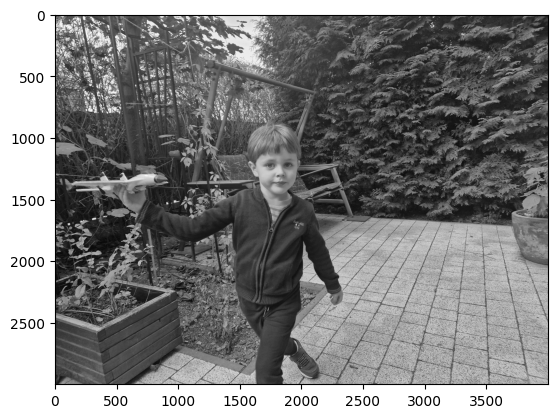

In [ ]:
plt.imshow(image_01, cmap='gray')


In [ ]:
image_02 = convert_image(r'/content/drive/MyDrive/dane/tymek-02.jpg')
image_02.shape

(1024, 768)

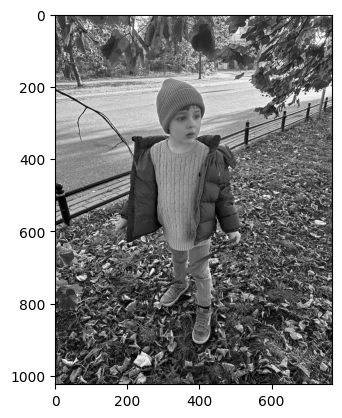

In [ ]:
plt.imshow(image_02, cmap='gray')

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

In [ ]:
model = Sequential(
   Conv2D(filters=1,
   kernel_size=(3,3),
   input_shape=(1024, 768, 1))
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1022, 766, 1)      10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
image4Conv = tf.expand_dims(image_02, 0)
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape

TensorShape([1, 1024, 768, 1])

In [ ]:
result = model.predict(image4Conv)
result.shape

1/1 [==============================] - 0s 267ms/step


(1, 1022, 766, 1)

In [ ]:
result = tf.squeeze(result)
result.shape

TensorShape([1022, 766])

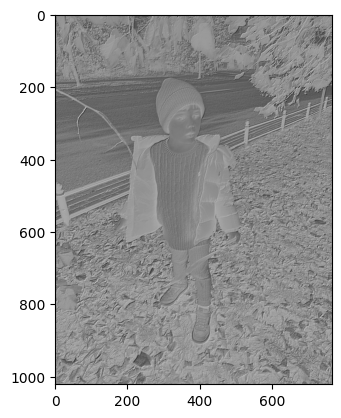

In [ ]:
plt.imshow(result, cmap='gray')

In [ ]:
from tensorflow.keras import backend as K

def my_filter(shape, dtype=None):
   # Ustawiamy filtr na detekcję pionowych i poziomych krawędzi
   f = np.array([
         [[[-2]], [[-1]], [[-1]]],
         [[[-5]], [[ 8]], [[-8]]],
         [[[-9]], [[-1]], [[-1]]]
   ])
   return K.variable(f, dtype='float32')

In [ ]:
model_edge = Sequential(
   Conv2D(filters=1,
          kernel_size=(3,3),
          kernel_initializer=my_filter,
          input_shape=(1022, 766, 1))
)

In [ ]:
image4Conv = tf.expand_dims(image_02, 0)
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape

TensorShape([1, 1024, 768, 1])

In [ ]:
model_edge = Sequential(
   Conv2D(filters=1,
          kernel_size=(3,3),
          kernel_initializer=my_filter,
          input_shape=(1024, 768, 1))
)

In [ ]:
result_edge = model_edge.predict(image4Conv)
result_edge.shape

1/1 [==============================] - 0s 149ms/step


(1, 1022, 766, 1)

In [ ]:
result_edge = tf.squeeze(result_edge)
result_edge.shape

TensorShape([1022, 766])

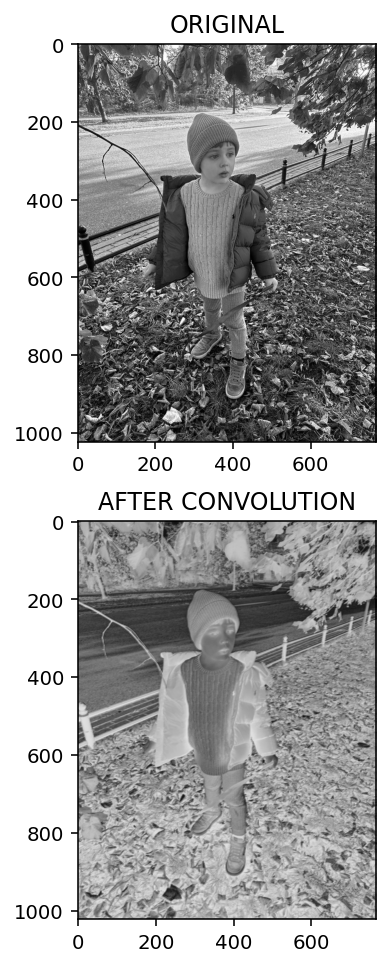

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 142
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(image_02, cmap='gray')
ax1.set_title('ORIGINAL')
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(result_edge, cmap='gray')
ax2.set_title('AFTER CONVOLUTION')
plt.show()

In [ ]:
def my_filter(shape, dtype=None):
   f = np.empty(shape=(7,7,1,1))
   f.fill(1/49)
   return K.variable(f, dtype='float32')

model_blur = Sequential(Conv2D(filters=1, kernel_size=(7,7), kernel_initializer=my_filter, input_shape=(1024, 768, 1)))
image4Conv = tf.expand_dims(image_02, 0)
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape
result_blur = model_blur.predict(image4Conv)
result_blur.shape

1/1 [==============================] - 0s 131ms/step


(1, 1018, 762, 1)

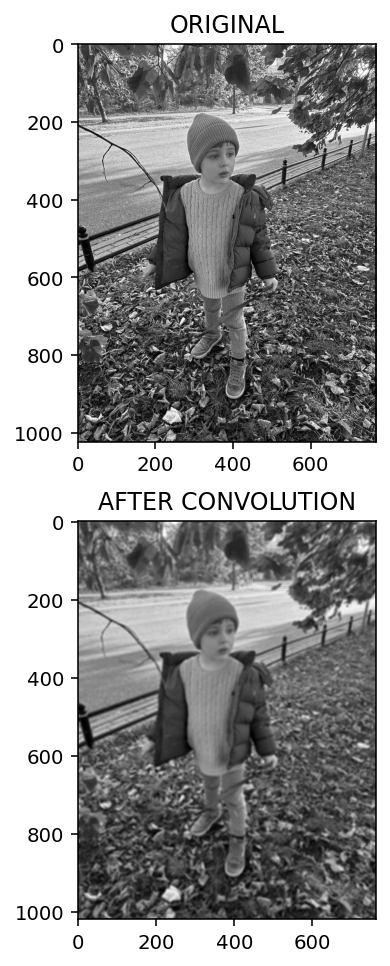

In [ ]:
result_blur = tf.squeeze(result_blur)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(image_02, cmap='gray')
ax1.set_title('ORIGINAL')
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(result_blur, cmap='gray')
ax2.set_title('AFTER CONVOLUTION')
plt.show()